In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
raw_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

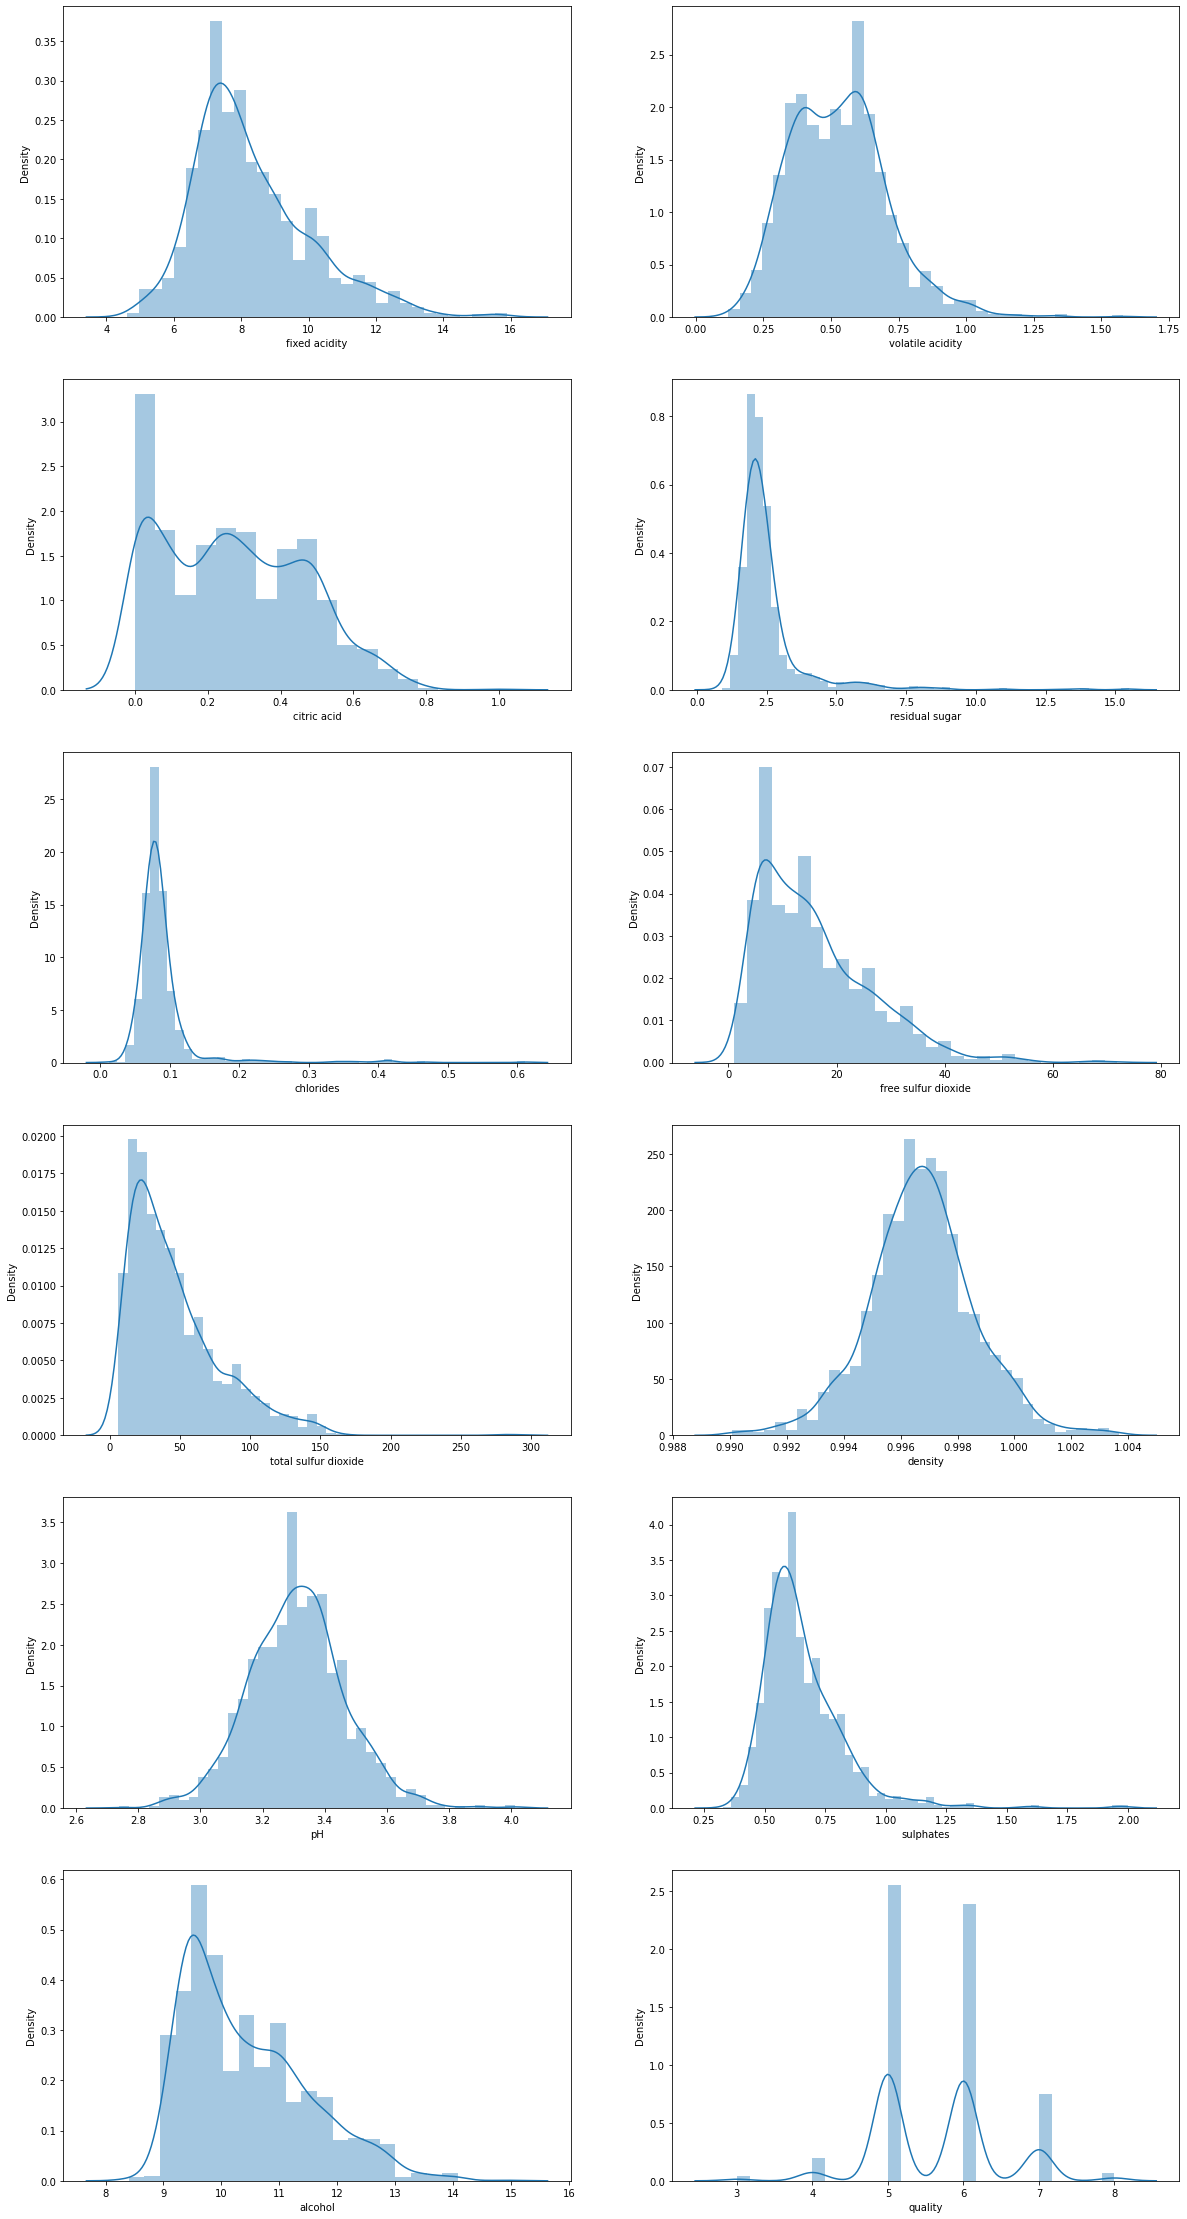

In [5]:
cols = raw_df.columns
plt.figure(figsize=(20,40), facecolor='white')

for i in range(0, len(cols)):
    plt.subplot(6, 2, i+1)
    sns.distplot(x=raw_df[cols[i]],kde=True)
    plt.xlabel(cols[i])

<AxesSubplot:title={'center':'Distribution of Quality feature'}, xlabel='quality', ylabel='Density'>

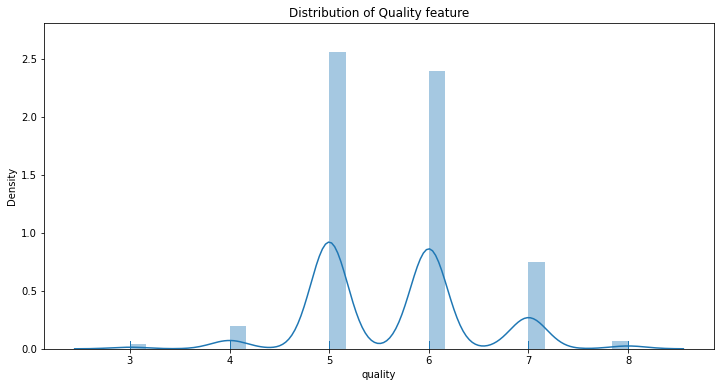

In [6]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Quality feature')
sns.distplot(raw_df['quality'],bins = 30,rug=True)

<AxesSubplot:>

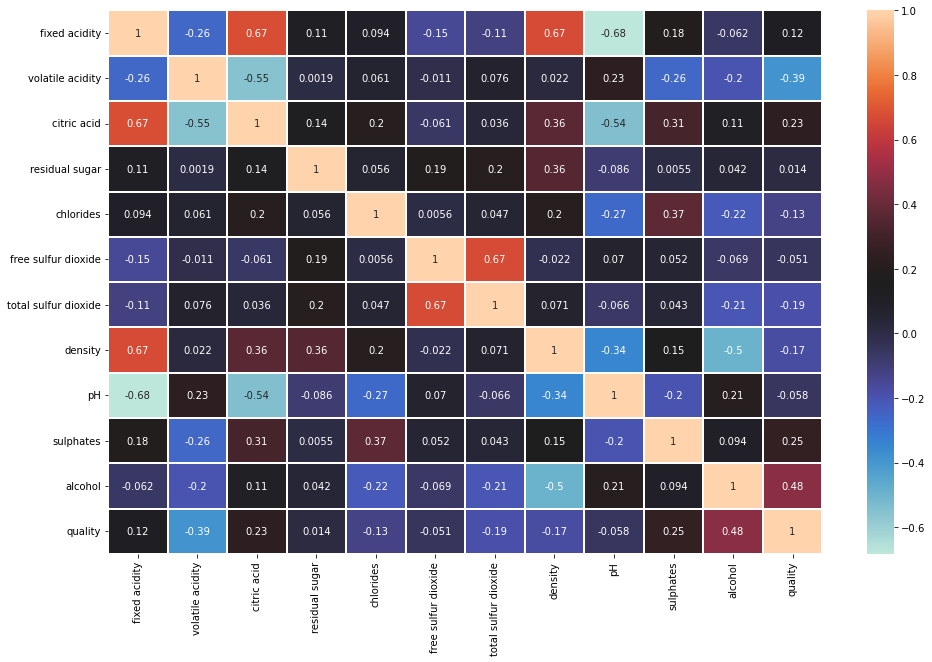

In [29]:
plt.figure(figsize=(16,10))

sns.heatmap(raw_df.corr(),annot=True,cmap='icefire',linewidths=0.2)

In [7]:
X=raw_df.drop("quality",axis=1) # Independent Features

In [8]:
y=raw_df["quality"] # Dependent Feature

In [9]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [10]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print("Train dataset contains {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))

print("Test dataset contains {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))

print("Train dataset contains {} rows.".format(y_train.shape[0]))

print("Test dataset contains {} rows.".format(y_test.shape[0]))

Train dataset contains 1071 rows and 11 columns.
Test dataset contains 528 rows and 11 columns.
Train dataset contains 1071 rows.
Test dataset contains 528 rows.


In [13]:
# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'linear', random_state = 0)
SVC_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [17]:
# Predicting the Test set results
SVC_prediction = SVC_model.predict(X_test_scaled)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, SVC_prediction))

[[  0   0   2   0   0   0]
 [  0   0  13   6   0   0]
 [  0   0 166  51   0   0]
 [  0   0  84 129   0   0]
 [  0   0   5  65   0   0]
 [  0   0   0   7   0   0]]


In [19]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,SVC_prediction)
accuracy

0.5587121212121212

### Applying Grid Search CV for Better Accuracy

In [20]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [22]:
grid_search = GridSearchCV(estimator = SVC_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [23]:
grid_search = grid_search.fit(X_train_scaled, y_train)

In [24]:
accuracy = grid_search.best_score_

In [25]:
accuracy

0.6554690204222914

In [26]:
grid_search.best_params_

{'C': 10, 'gamma': 0.8, 'kernel': 'rbf'}

In [27]:
SVC_model = SVC(kernel = 'rbf', gamma=0.7)
SVC_model.fit(X_train_scaled, y_train)

SVC(gamma=0.7)

In [30]:
# Predicting the Test set results
y_pred = SVC_model.predict(X_test_scaled)

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [33]:
accuracy

0.6287878787878788